In [4]:
import pandas as pd
import numpy as np

#import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # to see all columns
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200) 
pd.set_option('display.max_colwidth',900) # to see full coontent of column

In [5]:
df=pd.read_csv("Accident_Data.csv")

In [7]:
df.head()

,Railroad Code,Railroad Name,Report Year,Incident Number,Incident Year,Incident Month,Other Railroad Code,Other Railroad Name,Other Incident Number,Other Incident Year,Other Incident Month,Maintenance Incident Railroad Code,Maintenance Railroad Name,Maintainance Incident Number,Maintenance Incident Year,Maintenance Incident Month,Grade Crossing ID,Date,Time,Month,Day,Hour,Minute,AM/PM,Nearest Station,Division,Subdivision,County Code,County Name,State Code,State Name,City Name,Highway Name,Public/Private Code,Public/Private,Highway User Code,Highway User,Estimated Vehicle Speed,Vehicle Direction Code,Vehicle Direction,Highway User Position Code,Highway User Position,Equipment Involved Code,Equipment Involved,Railroad Car Unit Position,Equipment Struck Code,Equipment Struck,Hazmat Involvement Code,Hazmat Involvement,Hazmat Released by Code,Hazmat Released by,Hazmat Released Name,Hazmat Released Quantity,Hazmat Released Measure,Temperature,Visibility Code,Visibility,Weather Condition Code,Weather Condition,Equipment Type Code,Equipment Type,Track Type Code,Track Type,Track Name,Track Class,Number of Locomotive Units,Number of Cars,Train Speed,Estimated/Recorded Speed,Train Direction Code,Train Direction,Crossing Warning Expanded Code 1,Crossing Warning Expanded Code 2,Crossing Warning Expanded Code 3,Crossing Warning Expanded Code 4,Crossing Warning Expanded Code 5,Crossing Warning Expanded Code 6,Crossing Warning Expanded Code 7,Crossing Warning Expanded Code 8,Crossing Warning Expanded Code 9,Crossing Warning Expanded Code 10,Crossing Warning Expanded Code 11,Crossing Warning Expanded Code 12,Crossing Warning Expanded 1,Crossing Warning Expanded 2,Crossing Warning Expanded 3,Crossing Warning Expanded 4,Crossing Warning Expanded 5,Crossing Warning Expanded 6,Crossing Warning Expanded 7,Crossing Warning Expanded 8,Crossing Warning Expanded 9,Crossing Warning Expanded 10,Crossing Warning Expanded 11,Crossing Warning Expanded 12,Signaled Crossing Warning Code,Signaled Crossing Warning,Crossing Warning Explanation Code,Crossing Warning Explanation,Roadway Condition Code,Roadway Condition,Crossing Warning Location Code,Crossing Warning Location,Warning Connected To Signal,Crossing Illuminated,User Age,User Gender,User Struck By Second Train,Highway User Action Code,Highway User Action,Driver Passed Vehicle,View Obstruction Code,View Obstruction,Driver Condition Code,Driver Condition,Driver In Vehicle,Crossing Users Killed For Reporting Railroad,Crossing Users Injured For Reporting Railroad,Vehicle Damage Cost,Number Vehicle Occupants,Employees Killed For Reporting Railroad,Employees Injured For Reporting Railroad,Number People On Train,Form 54 Filed,Passengers Killed For Reporting Railroad,Passengers Injured For Reporting Railroad,Video Taken,Video Used,Special Study 1,Special Study 2,Narrative,Total Killed Form 57,Total Injured Form 57,Railroad Type,Joint Code,Total Killed Form 55A,Total Injured Form 55A,District,Whistle Ban Code,Whistle Ban,Report Key
0,BNSF,BNSF Railway Company,2009,CA0109200,9,1,NaN,NaN,NaN,NaN,NaN,BNSF,BNSF Railway Company,CA0109200,9.0,1.0,028440X,01/14/2009,7:40 AM,1,14,7,40,AM,CONEJO,CALIFORNIA,NaN,19.0,FRESNO,6.0,CALIFORNIA,NaN,CLARKSON AVE,Y,Public,J,Other motor vehicle,4.0,3.0,East,3.0,Moving over crossing,1,Train (units pulling),4.0,2.0,Rail equipment struck by highway user,4.0,Neither,4.0,Neither,NaN,NaN,NaN,37.0,2.0,Day,4.0,Fog,1,Freight Train,1.0,Main,MAIN TRACK,5,2.0,74.0,55.0,E,3.0,East,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Gates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cantilever FLS,1.0,Provided minimum 20-second warning,NaN,NaN,NaN,NaN,1.0,Both sides,NaN,No,30.0,Male,No,1.0,Went around the gate,No,8.0,Not obstructed,2.0,Injured,Yes,0.0,1.0,2000.0,1.0,0.0,0.0,2.0,No,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,1,1L,1,0,1,7.0,2.0,No,BNSFCA0109200200901
1,BNSF,BNSF Railway Company,2009,CA0109201,9,1,NaN,NaN,NaN,NaN,NaN,UP,Union Pacific Railroad Company,XXX,9.0,1.0,757414U,01/17/2009,5:52 PM,1,17,5,52,PM,ED

In [8]:
#get the size of dataframe
print ("Rows     : " , df.shape[0])  #get number of rows/observations
print ("Columns  : " , df.shape[1]) #get number of columns
print ("#"*30,"\n","Features : \n", df.columns.tolist()) #get name of columns/features

Rows     :  239487
Columns  :  141
############################## 
 Features : 
 ['Railroad Code', 'Railroad Name', 'Report Year', 'Incident Number', 'Incident Year', 'Incident Month', 'Other Railroad Code', 'Other Railroad Name', 'Other Incident Number', 'Other Incident Year', 'Other Incident Month', 'Maintenance Incident Railroad Code', 'Maintenance Railroad Name', 'Maintainance Incident Number', 'Maintenance Incident Year', 'Maintenance Incident Month', 'Grade Crossing ID', 'Date', 'Time', 'Month', 'Day', 'Hour', 'Minute', 'AM/PM', 'Nearest Station', 'Division', 'Subdivision', 'County Code', 'County Name', 'State Code', 'State Name', 'City Name', 'Highway Name', 'Public/Private Code', 'Public/Private', 'Highway User Code', 'Highway User', 'Estimated Vehicle Speed', 'Vehicle Direction Code', 'Vehicle Direction', 'Highway User Position Code', 'Highway User Position', 'Equipment Involved Code', 'Equipment Involved', 'Railroad Car Unit Position', 'Equipment Struck Code', 'Equipment Stru

In [9]:
df_train_car_accident=df[['Report Key','Railroad Code','Grade Crossing ID','Railroad Name',
                      'Report Year',
                      'Incident Month',
                      'Date', 
                      'Month', 'Day', 
                      'Hour', 'Minute',
                      'AM/PM','Nearest Station','Division',
                      'County Name',
                      'State Name',
                      'City Name', 'Highway Name', 
                      'Highway User', 
                      'Estimated Vehicle Speed',
                      'Vehicle Direction',
                      'Highway User Position', 
                      'Equipment Involved','Equipment Struck', 
                      'Temperature', 
                       'Visibility', 
                       'Weather Condition',
                       'Equipment Type',
                       'Track Type',
                        'Track Name', 
                        'Track Class', 
                       'Number of Locomotive Units',
                        'Number of Cars',
                       'Train Speed', 
                      'Estimated/Recorded Speed',
                       'Train Direction',
                       'Roadway Condition',
                      'Crossing Illuminated',
                      'Signaled Crossing Warning',
                      'User Age', 
                      'User Gender', 
                      'User Struck By Second Train',
                      'Highway User Action',
                      'Driver Passed Vehicle', 
                       'View Obstruction',
                       'Driver Condition',
                      'Driver In Vehicle', 
                      'Crossing Users Killed For Reporting Railroad',
                      'Crossing Users Injured For Reporting Railroad', 
                      'Vehicle Damage Cost', 
                      'Number Vehicle Occupants',
                      'Narrative',
                      'Employees Killed For Reporting Railroad', 
                      'Employees Injured For Reporting Railroad', 
                      'Number People On Train', 
                      'Passengers Killed For Reporting Railroad',
                      'Passengers Injured For Reporting Railroad',
                      'Total Killed Form 57',
                      'Total Injured Form 57', 
                      'Total Killed Form 55A',
                      'Total Injured Form 55A', 
                      'District']].copy()

In [10]:
df_train_car_accident.columns = [col.replace(' ','_') for col in df_train_car_accident.columns]
df_train_car_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239487 entries, 0 to 239486
Data columns (total 62 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Report_Key                                     239487 non-null  object 
 1   Railroad_Code                                  239487 non-null  object 
 2   Grade_Crossing_ID                              233973 non-null  object 
 3   Railroad_Name                                  239479 non-null  object 
 4   Report_Year                                    239487 non-null  int64  
 5   Incident_Month                                 239487 non-null  int64  
 6   Date                                           239477 non-null  object 
 7   Month                                          239487 non-null  int64  
 8   Day                                            239487 non-null  int64  
 9   Hour                                 

In [11]:
df_train_car_accident.isna().sum()

Report_Key                                            0
Railroad_Code                                         0
Grade_Crossing_ID                                  5514
Railroad_Name                                         8
Report_Year                                           0
Incident_Month                                        0
Date                                                 10
Month                                                 0
Day                                                   0
Hour                                                  0
Minute                                                0
AM/PM                                                31
Nearest_Station                                     890
Division                                         196612
County_Name                                         278
State_Name                                            5
City_Name                                         41294
Highway_Name                                    

<b> IN WHICH YEAR MAXIMUM ACCIDENT WERE REPORTED</b>

<Axes: xlabel='count', ylabel='Report_Year'>

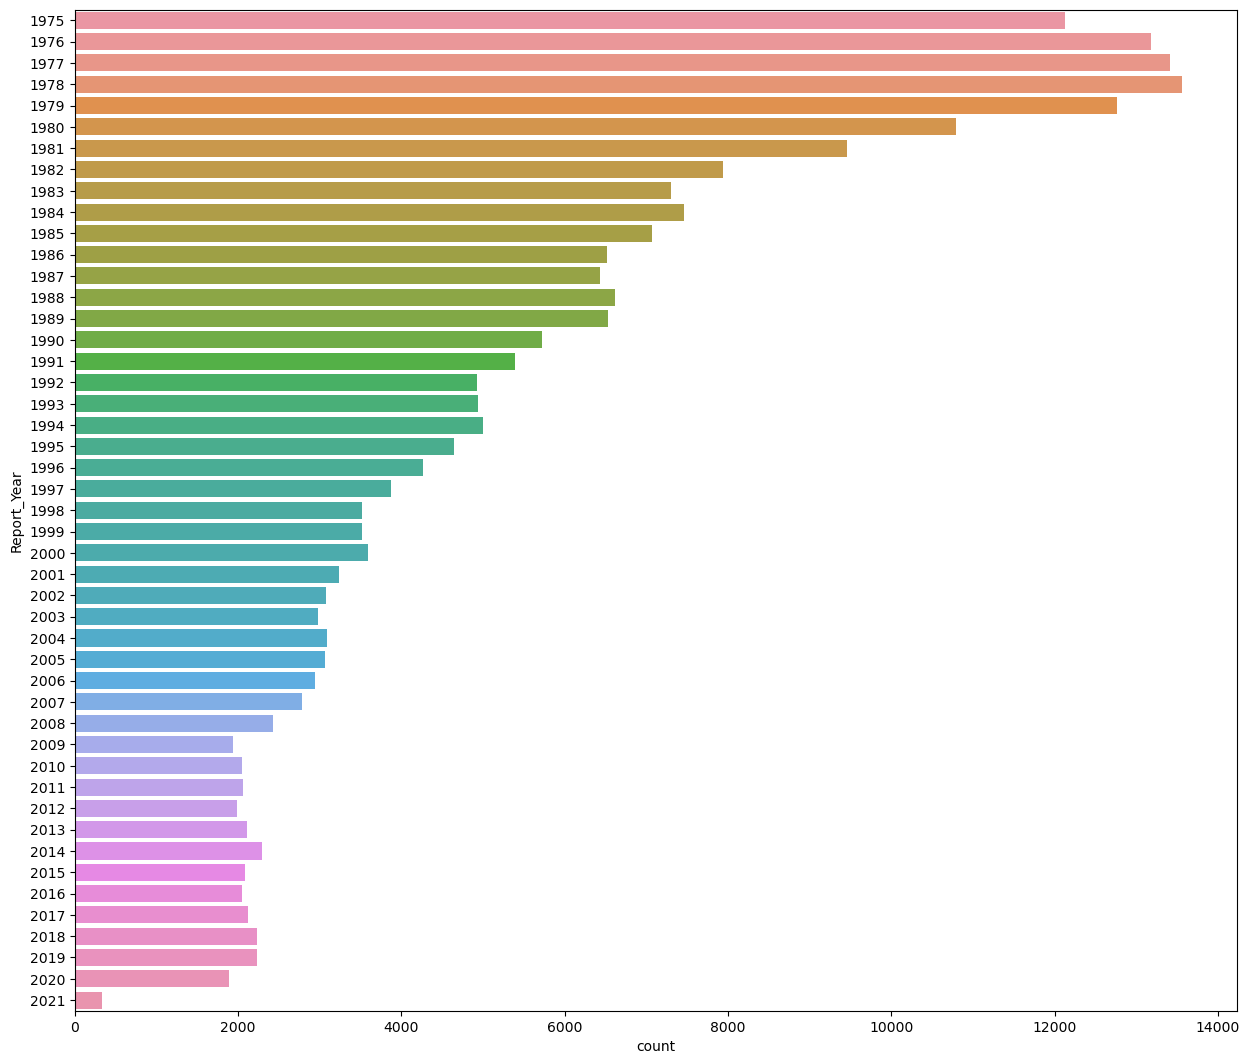

In [12]:
# Lets look visualize the relationship 
sns.set_palette(sns.color_palette("PuRd", 8))
plt.figure(figsize=(15,13))

sns.countplot(orient='v',y=df_train_car_accident.Report_Year,data=df_train_car_accident)
#sns.lineplot(x=df_train_car_accident.Report_Year,data=df_train_car_accident)

<Axes: ylabel='Density'>

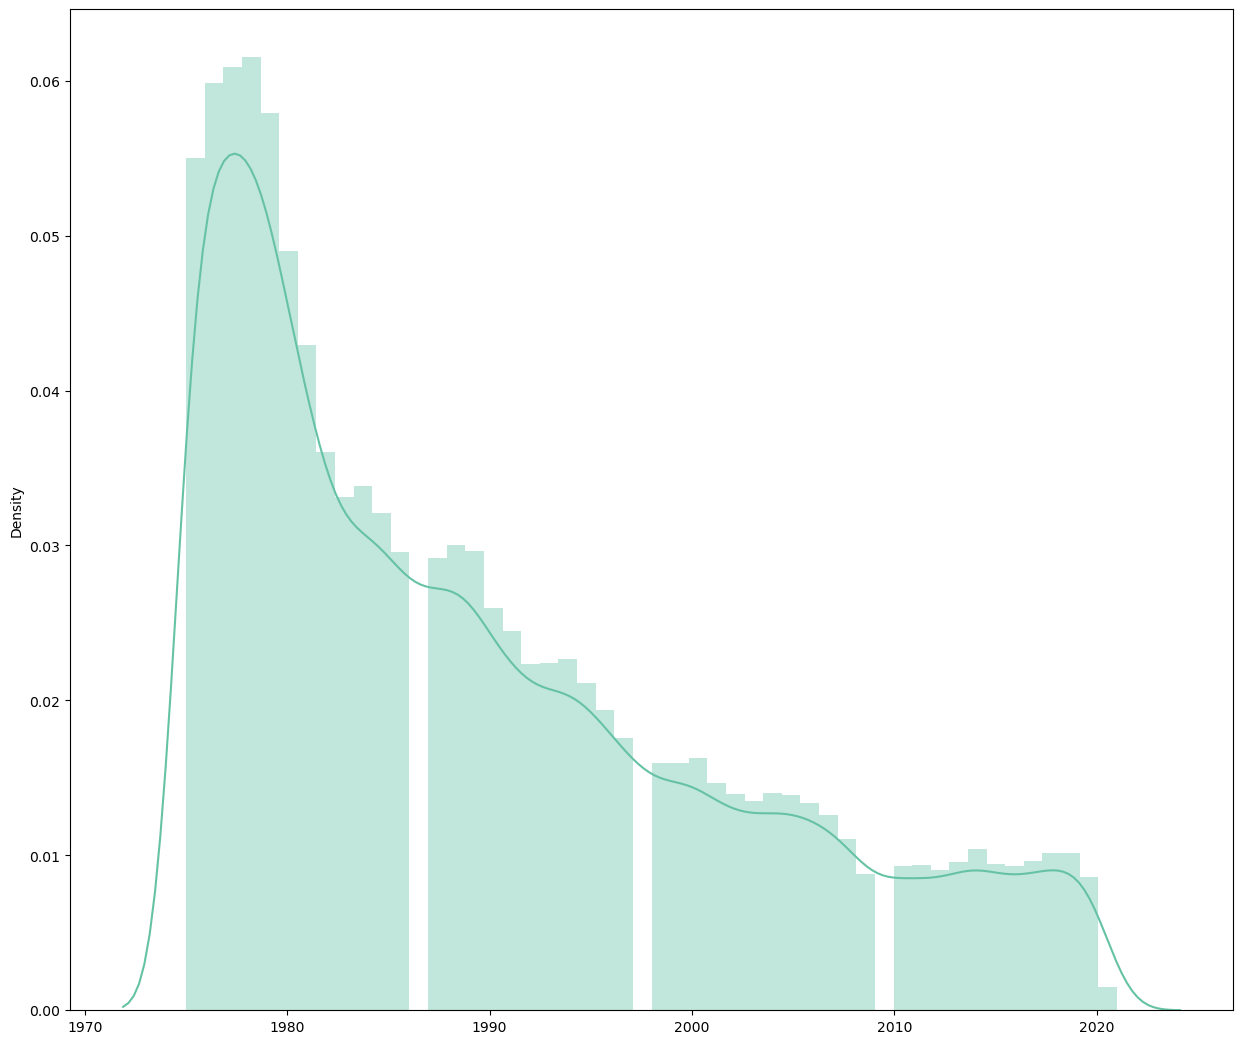

In [13]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,13))

sns.distplot(x=df_train_car_accident.Report_Year)

<b>STATE WISE ACCIDENT WAS REPORTED SINCE 1975-2021</b>

<Axes: xlabel='count', ylabel='State_Name'>

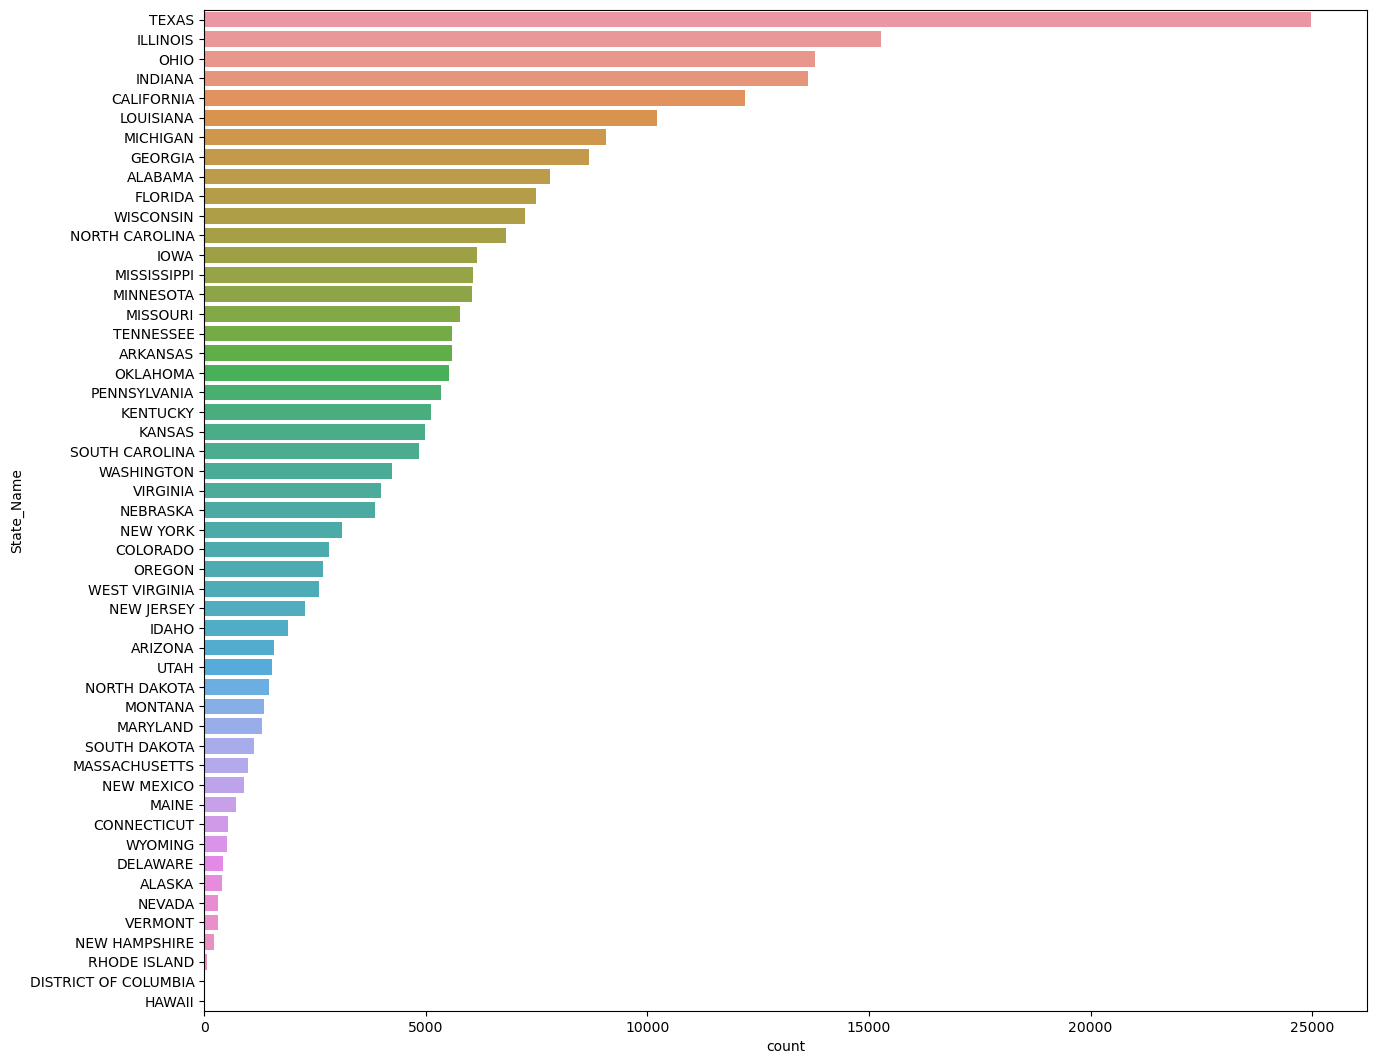

In [14]:
# Lets look visualize the relationship 
sns.set_palette(sns.color_palette("PuRd", 8))
plt.figure(figsize=(15,13))
order = df_train_car_accident['State_Name'].value_counts(ascending=False).index 
sns.countplot(orient='v',y=df_train_car_accident['State_Name'],data=df_train_car_accident,order=order)